# Exploration of the EU ETS data

In this notebook, we explore the data from the European Union ETS transaction log retrieved using the EUTL ORM developed by Jan Abrell (https://abrell.eu/). The website https://www.euets.info/ is a human-friendly entry point to the data. The ORM python model can be downloaded from https://github.com/jabrell/eutl_orm. 

A description of the data and of the relational model can be found here: https://euets.info/static/download/Description_EUTL_database.pdf

In this notebook, we concentrate on one single installation/one single "operator holding account".

## To start this notebook

You must have set up the EUTL ORM database locally as explained in the `README.md`.

In [2]:
import sys
sys.path.append('/home/tab/Projects/Hackathon/EUTL_ORM')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from eutl_orm import DataAccessLayer
from eutl_orm import Installation    
from attic import paths
from attic.connection_settings import connectionSettings

%matplotlib inline
plt.rc('xtick', labelsize=14)  #fontsize of the x tick labels
plt.rc('ytick', labelsize=14)  #fontsize of the y tick labels
plt.rc('axes', titlesize=18)  #fontsize of the title
plt.rc('figure', titlesize=20)  #fontsize of the title
plt.rc('axes', labelsize=15)  #fontsize of the axes labels
plt.rc('legend', fontsize=15)  #fontsize of the axes labels

Set up connection to the database:

In [3]:
dal = DataAccessLayer(**connectionSettings)
session = dal.session

## Installations

One "entry point" to the data consists in querying information about a particular installation, identified by its `installation_id`.

In [4]:
# "AT_26": Raffinerie Schwechat

installation_id = "AT_26"

In [5]:
installation = session.query(Installation).get(installation_id)
print(installation.id + ": " + installation.name)
print(installation.address)

AT_26: Raffinerie Schwechat
Mannswörther Straße 28
2320 Schwechat
Austria


Text(0.5, 1.0, 'Raffinerie Schwechat')

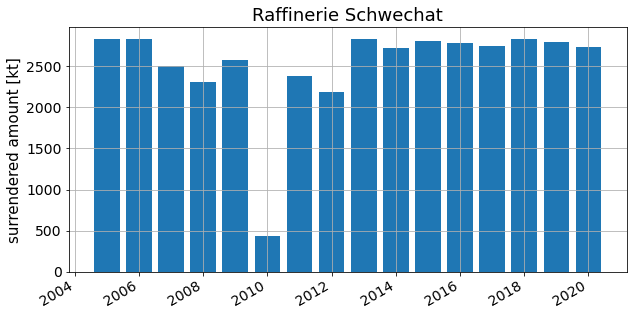

In [6]:
surrendering = installation.get_surrendering()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(surrendering.year, surrendering.amount / 1e3)
fig.autofmt_xdate()
ax.grid()
ax.set_ylabel("surrendered amount [kt]")
ax.set_title(installation.name)

## Operator Holding Accounts

At any given time, an installation is associated to a unique operator holding account. Over time, there can be several operator holding accounts:

In [7]:
operator_holding_accounts = installation.accounts
operator_holding_accounts

[<Account(494, 'AT Raffinerie Schwechat', 'AT', '100-7')>,
 <Account(223, 'AT Raffinerie Schwechat', 'AT', '120-0')>]

There are two different accounts. 120-0 denotes former operator holding accounts whereas 100-7 denotes the operating holding account. This account structure is common for installations that have been regulated under the EUETS already before 2013. Due to the change in the EUTL, all installation had to convert their account from 120-0 to 100-7 accounts. Consequently, our 2005 analysis has to focus in the 120-0 account with the meaningful name "Operator Account".

In [8]:
operator_holding_account = operator_holding_accounts[0]

## Transactions

Let's look at the transaction table for the current operator holding account for the considered installation.

In [10]:
transactions = operator_holding_account.get_transactions()
display(transactions.drop(columns=["project_id"]))
transactions.columns

,unitType_id,transferringAccount_id,transactionTypeMain_id,id,acquiringAccount_id,transactionTypeSupplementary_id,transactionID,amount,unitType,transactionTypeMain,transactionTypeSupplementary,acquiringAccountName,acquiringAccountType,transferringAccountName,transferringAccountType,direction,amount_directed
date,,,,,,,,,,,,,,,,,
2012-07-09 12:00:12.907,CER,698,10,2216514,494,0,EU31002,1842,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT OMVTRADING,Trading Account,1,1842
2012-07-09 12:00:12.907,CER,698,10,2216515,494,0,EU31002,152,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT OMVTRADING,Trading Account,1,152
2012-07-09 12:00:12.907,CER,698,10,2216516,494,0,EU31002,57,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT OMVTRADING,Trading Account,1,57
2012-07-09 12:00:19.058,CER,223,3,28044,494,0,AT22137,8183,CER - Certified Emission Reduction Unit,External - External transfer of unit between r...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT Raffinerie Schwechat,Former Operator Holding Account,1,8183
2012-07-09 12:00:19.058,CER,223,3,28043,494,0,AT22137,10000,CER - Certified Emission Reduction Unit,External - External transfer of unit between r...,NaN,AT Raffinerie Schwechat,Operator Holding Account,AT Raffinerie Schwechat,Former Operator Holding Account,1,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-17 14:15:10.237,EUA_2013,494,10,2660340,15478,2,EU450764,413731,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-413731
2018-04-17 14:15:10.237,EUA_2013,494,10,2660341,15478,2,EU450764,324600,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-324600
2018-04-17 14:15:10.237,EUA_2013,494,10,2660342,15478,2,EU450764,1595273,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-1595273


Index(['unitType_id', 'transferringAccount_id', 'transactionTypeMain_id', 'id',
       'project_id', 'acquiringAccount_id', 'transactionTypeSupplementary_id',
       'transactionID', 'amount', 'unitType', 'transactionTypeMain',
       'transactionTypeSupplementary', 'acquiringAccountName',
       'acquiringAccountType', 'transferringAccountName',
       'transferringAccountType', 'direction', 'amount_directed'],
      dtype='object')

### Transaction ID

Each entry in this table supposedly corresponds to a transaction involving the operator holding account. However, there can be several entries with the same transaction ids:

In [14]:
transaction_ids = transactions["transactionID"].unique()
transaction_id = np.random.choice(transaction_ids)
transaction_id_sel = transactions["transactionID"] == transaction_id
transactions[transaction_id_sel]

,unitType_id,transferringAccount_id,transactionTypeMain_id,id,project_id,acquiringAccount_id,transactionTypeSupplementary_id,transactionID,amount,unitType,transactionTypeMain,transactionTypeSupplementary,acquiringAccountName,acquiringAccountType,transferringAccountName,transferringAccountType,direction,amount_directed
date,,,,,,,,,,,,,,,,,,
2015-04-24 11:23:11.238,EUA_2013,494,10,2129464,NaN,15478,2,EU287454,5539,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-5539
2015-04-24 11:23:11.238,EUA_2013,494,10,2129459,NaN,15478,2,EU287454,909,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-909
2015-04-24 11:23:11.238,EUA_2013,494,10,2129460,NaN,15478,2,EU287454,123433,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-123433
2015-04-24 11:23:11.238,EUA_2013,494,10,2129462,NaN,15478,2,EU287454,30163,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-30163
2015-04-24 11:23:11.238,EUA_2013,494,10,2129463,NaN,15478,2,EU287454,50255,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-50255
2015-04-24 11:23:11.238,EUA_2013,494,10,2129461,NaN,15478,2,EU287454,11133,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-11133
2015-04-24 11:23:11.238,EUA_2013,494,10,2129474,NaN,15478,2,EU287454,10061,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-10061
2015-04-24 11:23:11.238,EUA_2013,494,10,2129480,NaN,15478,2,EU287454,43572,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-43572
2015-04-24 11:23:11.238,EUA_2013,494,10,2129479,NaN,15478,2,EU287454,36000,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-36000


The only distinction between the individual entries are the ID and the amount. For our purposes, it seems we can aggregate the amounts to a single transaction.

### Counterparties

Transactions occur between a transferring account (the one the allowances are transferred FROM) and an acquiring account (the one the allowances are transferred TO). What are the individual accounts ?

In [10]:
print("Transferring accounts (FROM)\n===============================")

for transferring_account in transactions["transferringAccountName"].unique():
    print(transferring_account)

print("\n")
print("Acquiring accounts (TO)\n==========================")
for acquiring_account in transactions["acquiringAccountName"].unique():
    print(acquiring_account)

Transferring accounts (FROM)
AT OMVTRADING
AT Raffinerie Schwechat
AT OMV TRADING
AT OMV Ethylenanlage AC 2 Erweiterung
EU EU ALLOCATION ACCOUNT
EU EU Credit Exchange Account
DE 23 - Anlagenkonto


Acquiring accounts (TO)
AT Raffinerie Schwechat
AT OMVTRADING
AT OMV Ethylenanlage AC 2 Erweiterung
AT OMV Biturox-Anlage
AT OMV SNOx-Anlage
AT Konto der Vertragspartei
EU EU Allowance deletion
EU EU Credit Exchange Account


### EU ALLOCATION ACCOUNT

`EU EU ALLOCATION ACCOUNT` denotes the account responsible for the **allocation of free allowances from the European Union.** In general, there is one allocation per year, usually in February. The amount of free certificates decreases regularly.

,unitType_id,transferringAccount_id,transactionTypeMain_id,id,project_id,acquiringAccount_id,transactionTypeSupplementary_id,transactionID,amount,unitType,transactionTypeMain,transactionTypeSupplementary,acquiringAccountName,acquiringAccountType,transferringAccountName,transferringAccountType,direction,amount_directed
date,,,,,,,,,,,,,,,,,,
2014-01-29 01:03:24.035,EUA_2013,15486,10,1769028,NaN,494,36,EU148717,1803162,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allocation of general allowances,AT Raffinerie Schwechat,Operator Holding Account,EU EU ALLOCATION ACCOUNT,Allocation Account,1,1803162
2014-04-16 01:11:28.607,EUA_2013,15486,10,1855345,NaN,494,36,EU191913,1759171,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allocation of general allowances,AT Raffinerie Schwechat,Operator Holding Account,EU EU ALLOCATION ACCOUNT,Allocation Account,1,1759171
2015-02-27 15:36:57.285,EUA_2013,15486,10,2041009,NaN,494,36,EU251408,1715882,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allocation of general allowances,AT Raffinerie Schwechat,Operator Holding Account,EU EU ALLOCATION ACCOUNT,Allocation Account,1,1715882
2016-02-19 01:12:12.861,EUA_2013,15486,10,2227742,NaN,494,36,EU315579,1675141,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allocation of general allowances,AT Raffinerie Schwechat,Operator Holding Account,EU EU ALLOCATION ACCOUNT,Allocation Account,1,1675141
2017-02-22 01:59:38.056,EUA_2013,15486,10,2407015,NaN,494,36,EU372100,1635202,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allocation of general allowances,AT Raffinerie Schwechat,Operator Holding Account,EU EU ALLOCATION ACCOUNT,Allocation Account,1,1635202
2018-02-22 01:35:29.625,EUA_2013,15486,10,2582382,NaN,494,36,EU424070,1595273,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allocation of general allowances,AT Raffinerie Schwechat,Operator Holding Account,EU EU ALLOCATION ACCOUNT,Allocation Account,1,1595273


Text(0.5, 1.0, 'Raffinerie Schwechat')

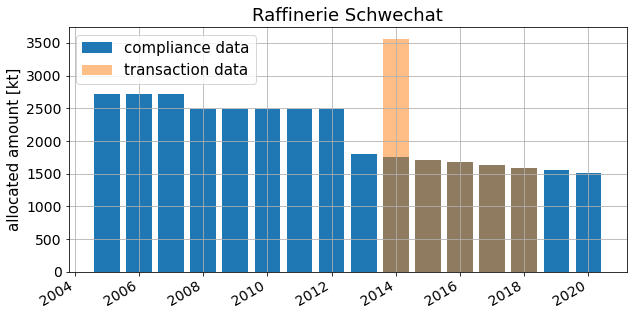

In [11]:
eu_allocation_sel = transactions["transferringAccountName"] == "EU EU ALLOCATION ACCOUNT"
eu_allocation = transactions[eu_allocation_sel]["amount"].resample("AS").sum()

display(transactions[eu_allocation_sel])

compliance_data = installation.get_compliance()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(compliance_data.year, compliance_data.allocatedFree / 1e3, label="compliance data")
ax.bar(eu_allocation.index.year, eu_allocation.values / 1e3, alpha=0.5, label="transaction data")
fig.autofmt_xdate()
ax.grid()
ax.set_ylabel("allocated amount [kt]")
ax.legend()
ax.set_title(installation.name)

If we compare these numbers to that of the compliance data, we see that the first transaction in 2014 actually corresponds to the free allowances for 2013 (the previous year).

### EU Allowance deletion

Let's look at **how allowances get deleted**. Here we compare the amount of allowances which were transferred to the `EU EU Allowance deletion` account with that labelled as "surrendered" in the compliance data.

In [12]:
allowance_deletion_sel = transactions["acquiringAccountName"] == "EU EU Allowance deletion"
display(transactions[allowance_deletion_sel])
allowance_deletion = transactions[allowance_deletion_sel]["amount"].resample("AS").sum()
allowance_deletion.index -= pd.DateOffset(years=1)

,unitType_id,transferringAccount_id,transactionTypeMain_id,id,project_id,acquiringAccount_id,transactionTypeSupplementary_id,transactionID,amount,unitType,transactionTypeMain,transactionTypeSupplementary,acquiringAccountName,acquiringAccountType,transferringAccountName,transferringAccountType,direction,amount_directed
date,,,,,,,,,,,,,,,,,,
2013-04-26 15:33:10.179,EUA_2013,494,10,2818218,NaN,15478,2,EU99370,40000,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-40000
2013-04-26 15:33:10.179,EUA_2013,494,10,2818220,NaN,15478,2,EU99370,150000,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-150000
2013-04-26 15:33:10.179,EUA_2013,494,10,2818219,NaN,15478,2,EU99370,1999692,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-1999692
2013-07-02 11:53:21.000,EUA_2013,494,10,1670984,NaN,15478,34,EU109935,57200,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,General allowances - Banking,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-57200
2014-04-17 14:02:47.962,EUA_2013,494,10,1859806,NaN,15478,2,EU194292,24041,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-24041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-17 14:15:10.237,EUA_2013,494,10,2660340,NaN,15478,2,EU450764,413731,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-413731
2018-04-17 14:15:10.237,EUA_2013,494,10,2660341,NaN,15478,2,EU450764,324600,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-324600
2018-04-17 14:15:10.237,EUA_2013,494,10,2660342,NaN,15478,2,EU450764,1595273,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Allowance surrender,EU EU Allowance deletion,Union Allowance Deletion Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-1595273


Text(0.5, 1.0, 'Raffinerie Schwechat')

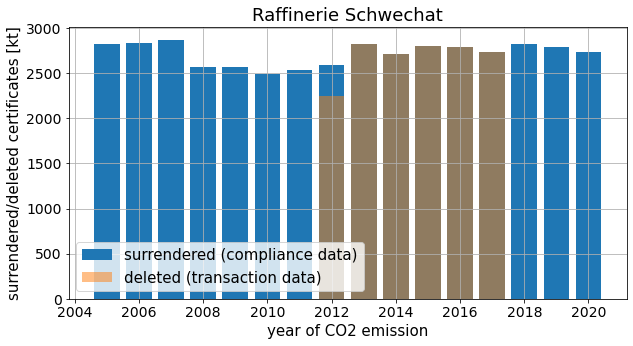

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(compliance_data.year, compliance_data.surrendered / 1e3, label="surrendered (compliance data)")
ax.bar(allowance_deletion.index.year, allowance_deletion.values / 1e3, alpha=0.5, label="deleted (transaction data)")
ax.set_ylabel("surrendered/deleted certificates [kt]")
ax.grid()
ax.legend(loc="lower left")
ax.set_xlabel("year of CO2 emission")
ax.set_title(installation.name)

Here, we see a mismatch: depending on the year, there may be more deleted than surrendered allowances, or the opposite. What's the difference ?

### EU Credit Exchange Account

We also observe transactions in both direction between the operator holding account and the socalled `EU Credit Exchange Account`. What's that ?

In [14]:
credit_exchange_sel = (transactions["acquiringAccountName"] == "EU EU Credit Exchange Account") | (transactions["transferringAccountName"] == "EU EU Credit Exchange Account")
credit_exchange = transactions[credit_exchange_sel]
display(credit_exchange)

,unitType_id,transferringAccount_id,transactionTypeMain_id,id,project_id,acquiringAccount_id,transactionTypeSupplementary_id,transactionID,amount,unitType,transactionTypeMain,transactionTypeSupplementary,acquiringAccountName,acquiringAccountType,transferringAccountName,transferringAccountType,direction,amount_directed
date,,,,,,,,,,,,,,,,,,
2014-04-16 17:12:56.607,CER,494,10,1858383,1744.0,41289,71,EU193497,388,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,Exchange,EU EU Credit Exchange Account,Credit Exchange Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-388
2014-04-16 17:12:56.607,CER,494,10,1858384,2008.0,41289,71,EU193497,422,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,Exchange,EU EU Credit Exchange Account,Credit Exchange Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-422
2014-04-16 17:12:56.607,CER,494,10,1858385,2206.0,41289,71,EU193497,40000,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,Exchange,EU EU Credit Exchange Account,Credit Exchange Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-40000
2014-04-16 17:12:56.607,CER,494,10,1858386,6428.0,41289,71,EU193497,100000,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,Exchange,EU EU Credit Exchange Account,Credit Exchange Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-100000
2014-04-16 17:12:56.607,CER,494,10,1858387,2008.0,41289,71,EU193497,2,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,Exchange,EU EU Credit Exchange Account,Credit Exchange Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-2
2014-04-16 17:12:56.607,CER,494,10,1858388,447.0,41289,71,EU193497,90,CER - Certified Emission Reduction Unit,Internal - Internal transfer of unit/supplemen...,Exchange,EU EU Credit Exchange Account,Credit Exchange Account,AT Raffinerie Schwechat,Operator Holding Account,-1,-90
2014-04-16 17:13:53.997,EUA_2013,41288,10,1858580,NaN,494,72,EU193604,121646,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Exchanged,AT Raffinerie Schwechat,Operator Holding Account,EU EU Credit Exchange Account,Credit Exchange Account,1,121646
2014-04-16 17:13:53.997,EUA_2013,41288,10,1858579,NaN,494,72,EU193604,19256,EU General Allowances (EUA),Internal - Internal transfer of unit/supplemen...,Exchanged,AT Raffinerie Schwechat,Operator Holding Account,EU EU Credit Exchange Account,Credit Exchange Account,1,19256


Text(0, 0.5, 'net amount [kt]')

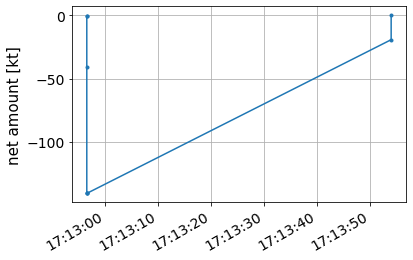

In [15]:
fig, ax = plt.subplots()
ax.plot(credit_exchange["amount_directed"].cumsum() / 1e3, '.-')
fig.autofmt_xdate()
ax.grid()
ax.set_ylabel("net amount [kt]")

In this particular example, we see that a large amount of allowances have been transferred to the EU Credit Exchange Account for about one minute and then transferred back to the installation. Why ?

### Allowance holding

Using this transaction data, we can track how much emission allowances were "held" by the installation at any point in time. Note that the offset is arbitrary.

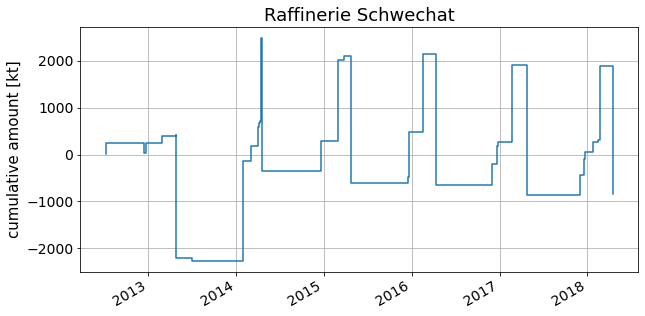

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(transactions.index, transactions["amount_directed"].cumsum() / 1e3, ds="steps-post")
ax.grid()
ax.set_ylabel("cumulative amount [kt]")
ax.set_title(installation.name)
fig.autofmt_xdate()

We observe that:

- each year in February, the facility gets a bunch of free allowances,
- each year in April, the facility deletes/surrenders a bunch of allowances
- it seems that most of the allowances that the installation acquires by other means that direct allocation from the European Union are gathered at the end of the year/at the beginning of the following year (with respect to the year for which emissions have to be accounted for).

## Pricing the ETS transactions

We want to give a price/a monetary value to the ETS transactions for this installation. For that, we use daily ETS prices retrieved from https://icapcarbonaction.com/en/ets-prices and price each transaction to the corresponding (daily) price, with the exception of free allocation and deletion, which we price at 0.

Text(0, 0.5, 'price of CO2 emission allowances [EUR/t]')

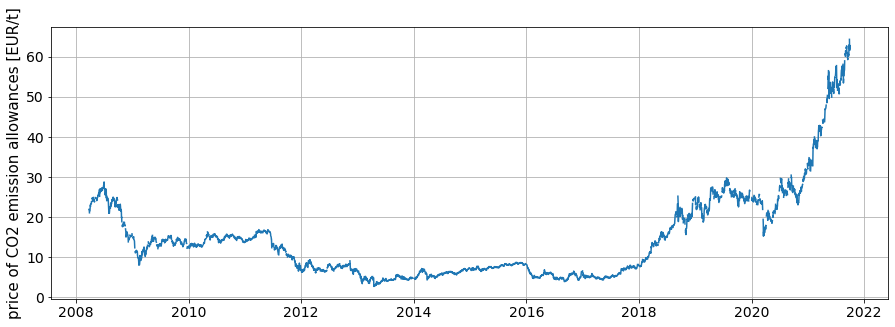

In [17]:
prices = pd.read_csv(paths.path_data / "ets.csv")
prices["date"] = pd.to_datetime(prices["date"])
price = prices.set_index("date")["ets_price"]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(price)
ax.grid()
ax.set_ylabel("price of CO2 emission allowances [EUR/t]")

In [18]:
transactions["date"] = pd.to_datetime(transactions.index.date)
transactions["datetime"] = transactions.index
transactions.index.name = "datetime"
transactions = transactions.merge(prices, on="date")

free_allocation = transactions["transferringAccountName"] == "EU EU ALLOCATION ACCOUNT"
deletion = transactions["acquiringAccountName"] == "EU EU Allowance deletion"
transactions.loc[free_allocation, "ets_price"] = 0.0
transactions.loc[deletion, "ets_price"] = 0.0

# amount_directed > 0 : allowances are transferred TO the installation (e.g. free allocation, purchase...)
# amount_directed < 0 : allowances are transferred FROM the installation (e.g. deletion, sale...)
transactions["value"] = transactions["ets_price"] * transactions["amount_directed"]

cumulative_value = transactions[["datetime", "value"]]
cumulative_value = cumulative_value.groupby("datetime").sum()
cumulative_value = cumulative_value.cumsum()

Using this data, we can look at the **estimated cumulative (net) costs associated with the purchase of emission allowances for the installation**.

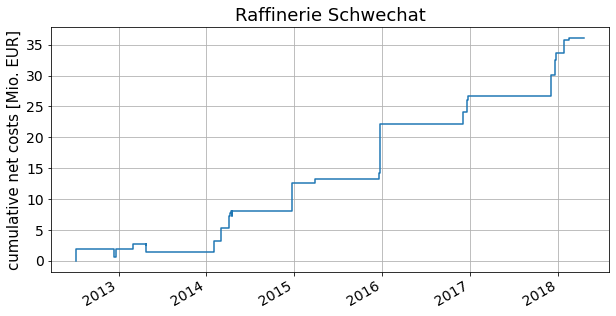

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(cumulative_value / 1e6, ds="steps-post")
ax.grid()
ax.set_ylabel("cumulative net costs [Mio. EUR]")
ax.set_title(installation.name)
fig.autofmt_xdate()

## Discussion/next steps

- We have looked at a single, arbitrary installation. However, most transactions from and to this installation involve counterparties belonging to the same organization. Pricing these internal transactions may not be relevant. Hence we will **aggregate transactions over the same "relevant market entity"**.